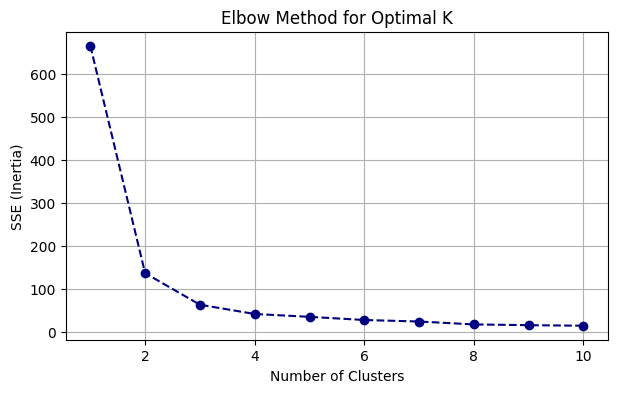

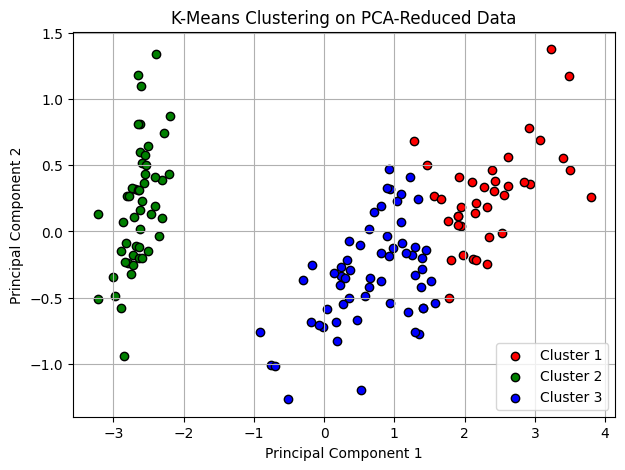

Silhouette Score (K=3): 0.598


In [1]:
# Task 8: Unsupervised Clustering with K-Means

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 1. Load dataset
iris = load_iris()
features = pd.DataFrame(iris.data, columns=iris.feature_names)

# Optional: Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features)

# 2. Elbow Method to choose optimal K
sse = []
cluster_range = range(1, 11)
for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=42, n_init='auto')
    model.fit(reduced_data)
    sse.append(model.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(7, 4))
plt.plot(cluster_range, sse, marker='o', linestyle='--', color='navy')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.grid(True)
plt.show()

# 3. Fit final model with chosen K (e.g., 3 for Iris)
k_opt = 3
kmeans_final = KMeans(n_clusters=k_opt, random_state=42, n_init='auto')
clusters = kmeans_final.fit_predict(reduced_data)

# 4. Visualize clusters
plt.figure(figsize=(7, 5))
colors = ['red', 'green', 'blue']
for i in range(k_opt):
    plt.scatter(reduced_data[clusters == i, 0],
                reduced_data[clusters == i, 1],
                label=f'Cluster {i+1}', color=colors[i], edgecolor='black')
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

# 5. Evaluate with Silhouette Score
sil_score = silhouette_score(reduced_data, clusters)
print(f"Silhouette Score (K={k_opt}):", round(sil_score, 3))
